링크 [https://www.kaggle.com/datasets/prachi13/customer-analytics/data]

In [233]:
# 한글 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [234]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
from dotenv import load_dotenv

print(load_dotenv())

False


In [236]:
!kaggle datasets download prachi13/customer-analytics

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other
customer-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [237]:
import zipfile

HOME = os.getcwd()

zip_file_path = os.path.join(HOME,'customer-analytics.zip')
extract_to_path = os.path.join(HOME,'data')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print(f"압축 해제 완료: {extract_to_path}")
# 해제된 파일 목록 확인
print("현재 폴더 파일 목록:", os.listdir(extract_to_path))

압축 해제 완료: c:\Users\User\github\DataScience\Ecom_Shipping\data
현재 폴더 파일 목록: ['Train.csv']


데이터셋 불러오기

In [238]:
HOME = os.getcwd()

df_csv= os.path.join(extract_to_path,'train.csv')

df = pd.read_csv(df_csv)

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**컬럼 소개 (California Housing Dataset)**

행의 수 : 10999 <br>
컬럼 수 : 12 

* **ID**: 고객 ID 번호
* **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)
* **Mode of shipment**: 배송 수단 (선박, 항공, 도로)
* **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수
* **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)
* **Cost of rhthe product**: 제품 가격 (미국 달러 기준)
* **Prior purchases**: 이전 구매 횟수
* **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)
* **Gender**: 성별 (남성, 여성)
* **Discount offered**: 해당 제품에 제공된 할인액
* **Weight in gms**: 제품 무게 (그램 단위)
* **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

### [배송 지연 원인](https://pthms.com/news/shipment-delay-what-are-the-causal-factors-of-delays-in-shipments-?utm_source=chatgpt.com)
* 악천후 / 외부 요인: 폭풍, 안개 등 기상 악화나 사고가 운송 경로의 안전을 위협하여 이동이 중단되거나 늦어지는 현상을 의미<br>
-> 외부 환경 데이터의 부재 (기상, 사고)<br>
* 일정 변경 및 교통 문제: 운항 스케줄의 변동이나 도로·항로의 병목 현상으로 인해 정해진 출발 및 도착 시간이 지연되는 상황<br>
-> 운송 데이터의 부재 (운송 스케줄, 도로·항로의 병목 현상)<br>
* 세관 문제: 국제 운송 시 서류 부실이나 규정 위반으로 인해 국경 통과를 위한 검사와 승인 절차가 길어지는 것을 의미<br>
-> 제품 가격(Cost), 할인액(Discount)<br>
* 터미널 혼잡: 항구, 공항, 물류 창고 등에 화물이 몰려 상하차 및 처리 대기 시간이 길어지면서 배송이 늦어지는 상태를 의미<br>
-> 배송 수단(Mode), 창고 구역(Block)<br>
* 적재 제외(롤드/오프로드): 운송 수단의 용량 부족이나 서류 문제로 인해 화물이 계획된 편편에 실리지 못하고 다음 차례로 밀려나는 현상을 의미<br>
-> 제품 중요도(Importance), 무게(Weight)<br>

+정시 도착 여부와 고객들의 관계<br>
-> 고객 문의 횟수 (Customer care calls),고객 평점 (Customer rating),이전 구매 횟수 (Prior purchases),성별 (Gender)

In [240]:
# Reached on time을 target으로 변경
df['target'] = df['Reached.on.Time_Y.N']
df = df.drop(columns=['Reached.on.Time_Y.N'])
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [241]:
# 1. 특정 범위 설정
x_min, x_max = 1000, 2000
y_min, y_max = 0, 10
# 2. 조건에 맞는 데이터 필터링
subset = df[
    (df['Weight_in_gms'] >= x_min) & (df['Weight_in_gms'] <= x_max) & 
    (df['Discount_offered'] >= y_min) & (df['Discount_offered'] <= y_max)
]
# 3. 개수 출력
count = len(subset)
print(f"해당 영역({x_min}~{x_max}, {y_min}~{y_max}) 내의 점 개수: {count}개")
print(f"그 중 배송 지연(target=1)인 개수: {subset['target'].sum()}개")

해당 영역(1000~2000, 0~10) 내의 점 개수: 2123개
그 중 배송 지연(target=1)인 개수: 1077개


### 데이터 분석

#### **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [242]:
df['target'].value_counts()

target
1    6563
0    4436
Name: count, dtype: int64

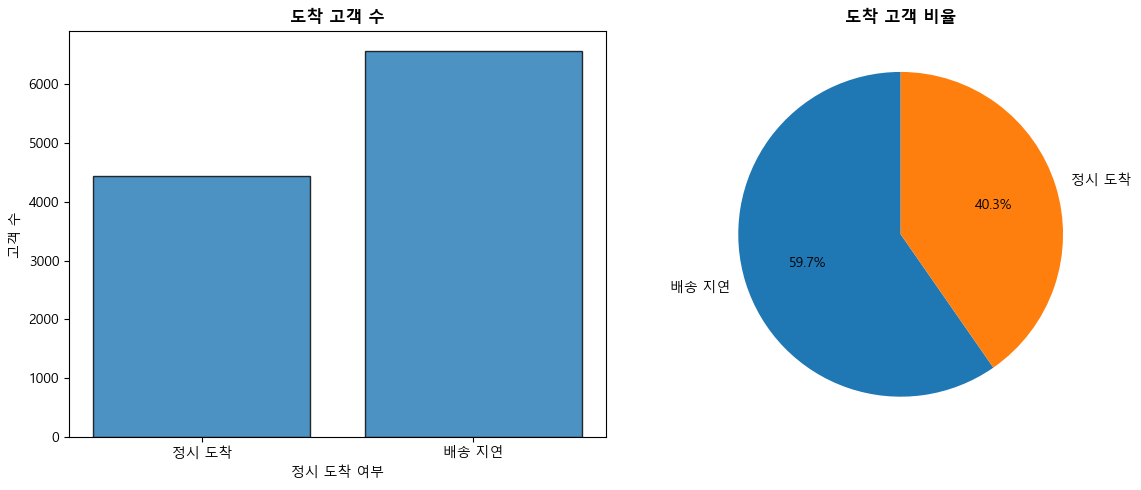

In [243]:
class_counts = df['target'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대 그래프
axes[0].bar(df['target'].unique(), class_counts.values, edgecolor='black', alpha=0.8)
axes[0].set_title('도착 고객 수', fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['정시 도착', '배송 지연'])
axes[0].set_xlabel('정시 도착 여부')
axes[0].set_ylabel('고객 수')

# 파이 차트
m_labels = ['배송 지연', '정시 도착'] 
axes[1].pie(class_counts.values, labels=m_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('도착 고객 비율', fontweight='bold')
plt.tight_layout()
plt.show()

#### **ID**: 고객 ID 번호

In [244]:
print(f"중복되지 않은 데이터 수: {df['ID'].nunique()}")
print("중복된 데이터 수:", df['ID'].duplicated().sum())
print("중복된 데이터가 많아서 ID 삭제")

중복되지 않은 데이터 수: 10999
중복된 데이터 수: 0
중복된 데이터가 많아서 ID 삭제


In [245]:
mean_val = df['target'].mean()

#### **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)

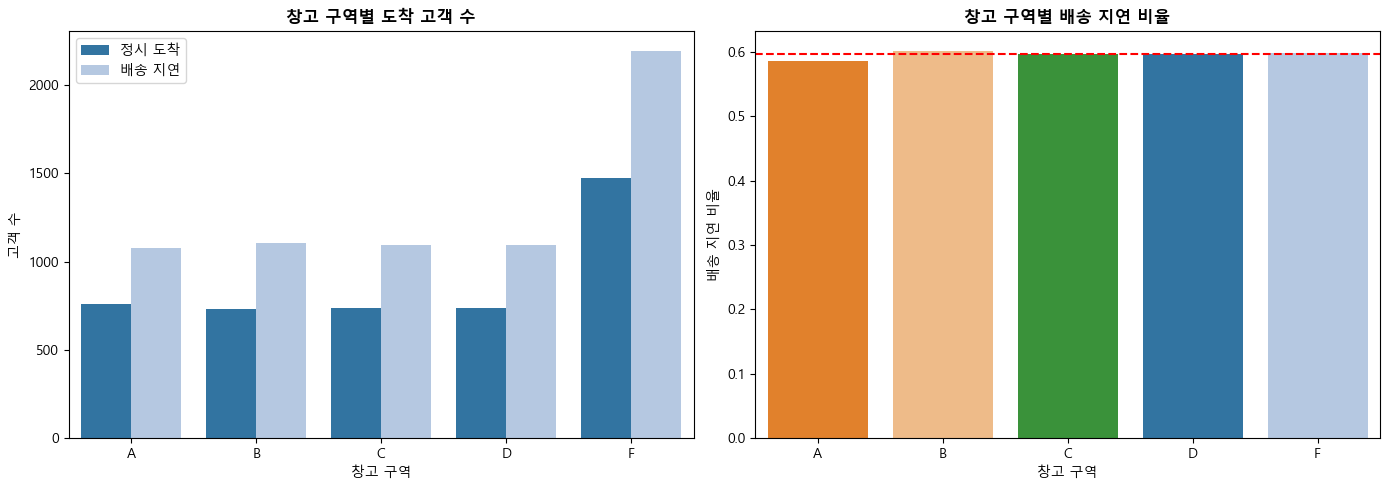

In [246]:
sorted_warehouse = sorted(df['Warehouse_block'].unique())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Warehouse_block', hue='target', data=df, order=sorted_warehouse, palette='tab20', ax=axes[0])
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_title('창고 구역별 도착 고객 수', fontweight='bold')
axes[0].set_xlabel('창고 구역')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Warehouse_block', y='target', data=df, order=sorted_warehouse, palette='tab20', hue='Warehouse_block', errorbar=None, ax=axes[1])
axes[1].set_title('창고 구역별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('창고 구역')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Mode of shipment**: 배송 수단 (선박, 항공, 도로)

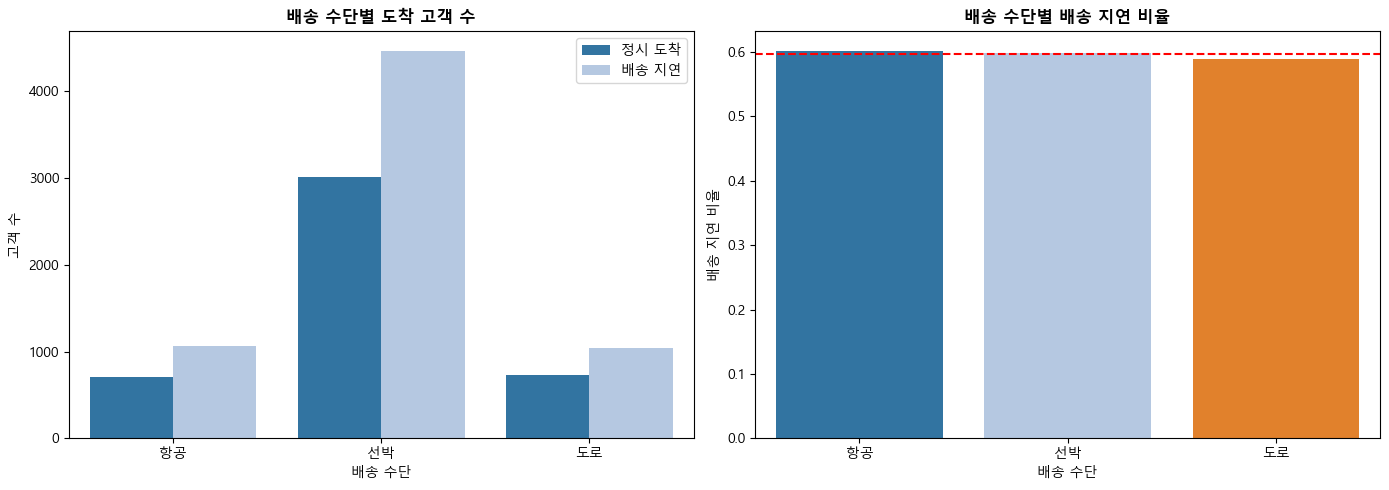

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Mode_of_Shipment', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('배송 수단별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['항공', '선박','도로'])
axes[0].set_xlabel('배송 수단')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Mode_of_Shipment', y='target', data=df, palette='tab20', hue='Mode_of_Shipment', errorbar=None, ax=axes[1])
axes[1].set_title('배송 수단별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['항공', '선박','도로'])
axes[1].set_xlabel('배송 수단')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수

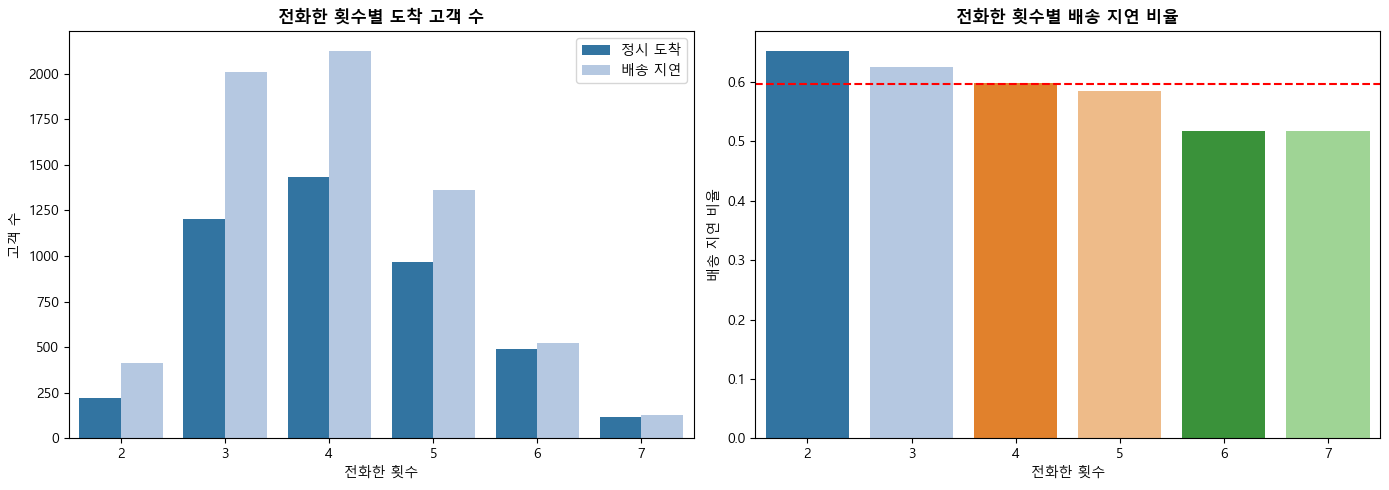

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_care_calls', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('전화한 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('전화한 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_care_calls', y='target', data=df, palette='tab20', hue='Customer_care_calls', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('전화한 횟수별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('전화한 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)

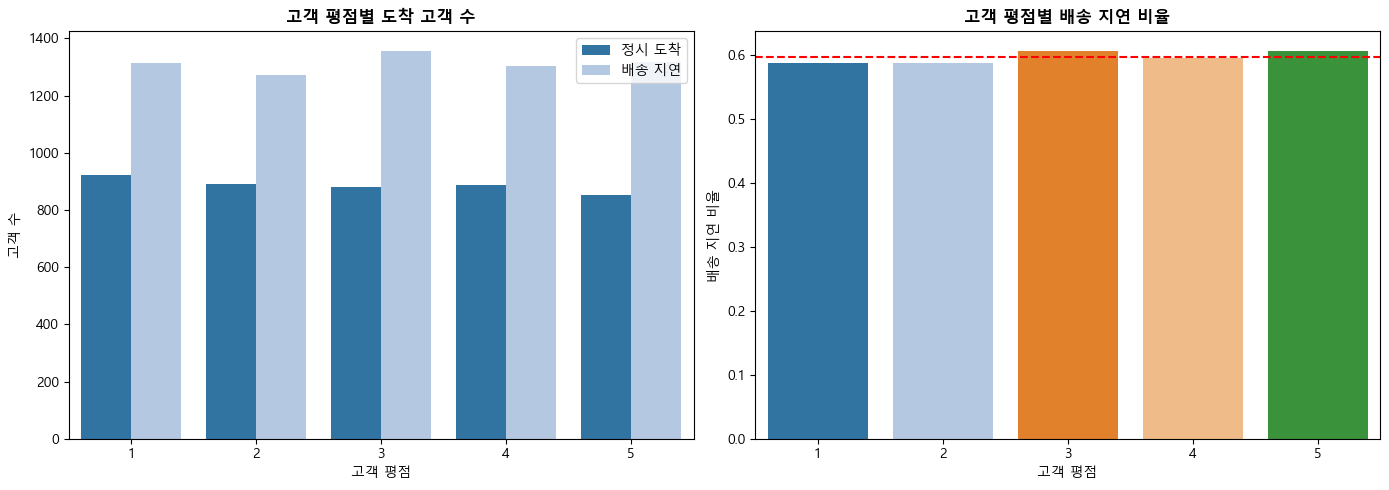

In [249]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_rating', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('고객 평점별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('고객 평점')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_rating', y='target', data=df, palette='tab20', hue='Customer_rating', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('고객 평점별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('고객 평점')
axes[1].set_ylabel('배송 지연 비율')
plt.tight_layout()
plt.show()

#### **Cost of the product**: 제품 가격 (미국 달러 기준)

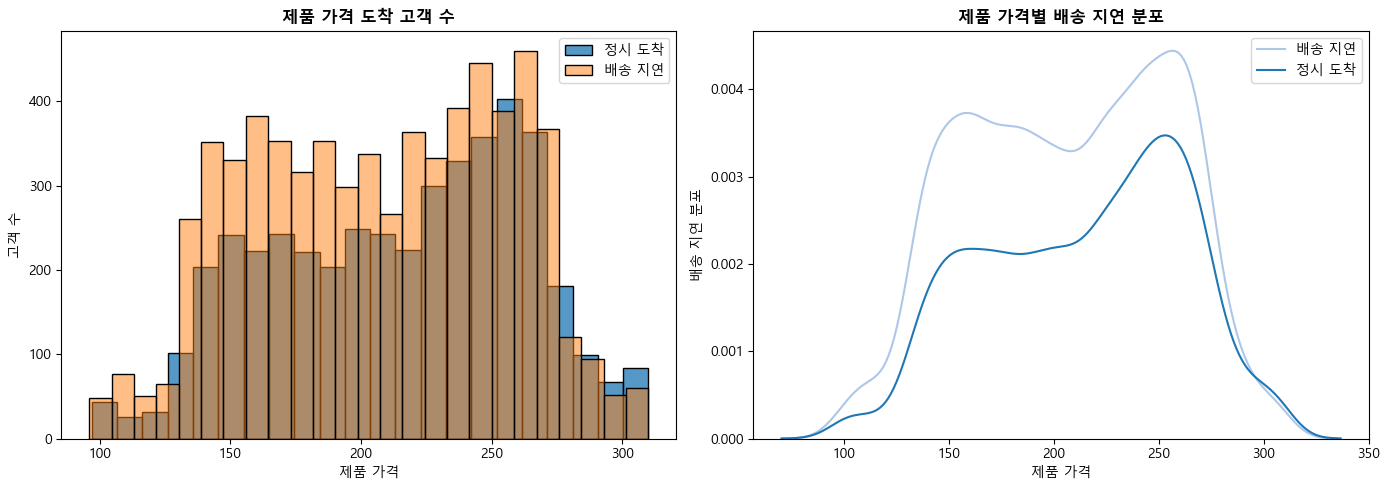

In [250]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Cost_of_the_Product'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Cost_of_the_Product'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 가격 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 가격')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Cost_of_the_Product', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 가격별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 가격')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

#### **Prior purchases**: 이전 구매 횟수

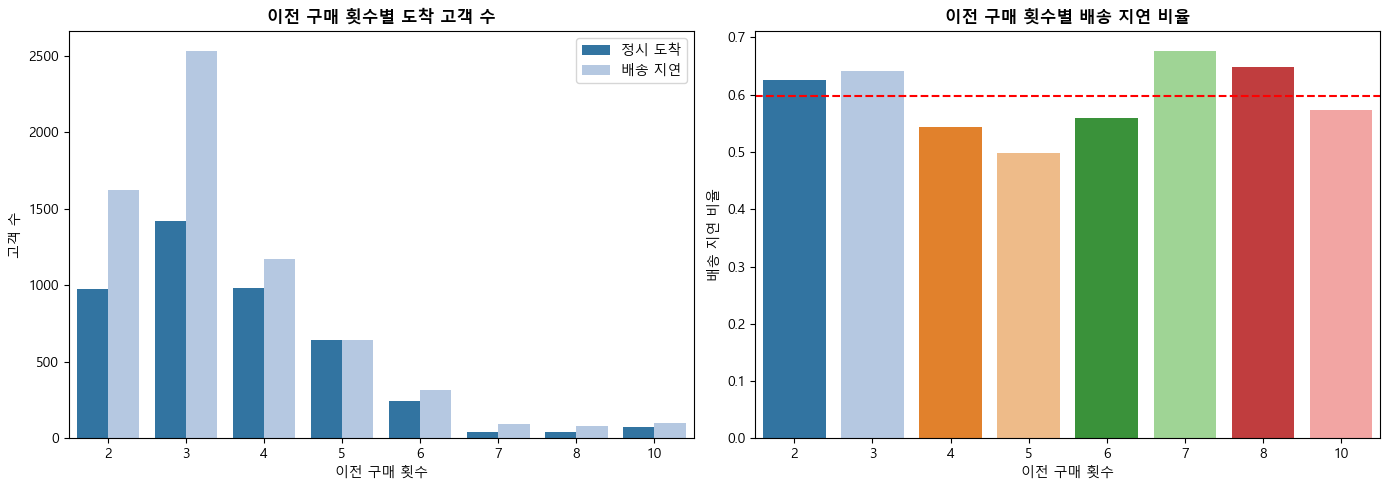

In [251]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Prior_purchases', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('이전 구매 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('이전 구매 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Prior_purchases', y='target', data=df, palette='tab20', hue='Prior_purchases', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('이전 구매 횟수별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('이전 구매 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)

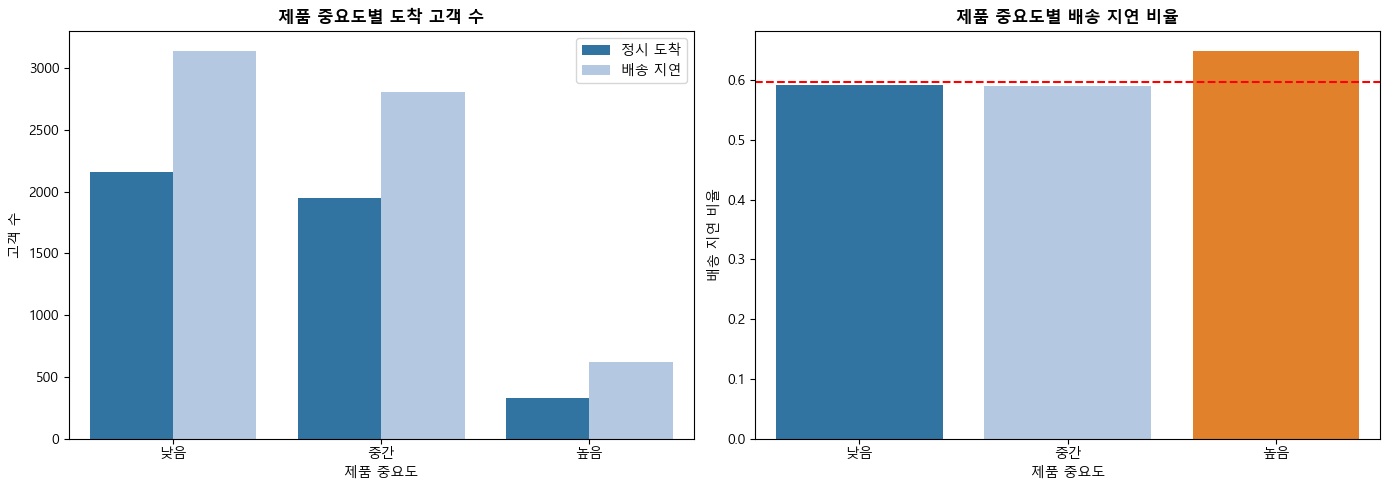

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Product_importance', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('제품 중요도별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['낮음', '중간', '높음'])
axes[0].set_xlabel('제품 중요도')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Product_importance', y='target', data=df, palette='tab20', hue='Product_importance', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('제품 중요도별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['낮음', '중간', '높음'])
axes[1].set_xlabel('제품 중요도')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Gender**: 성별 (남성, 여성)

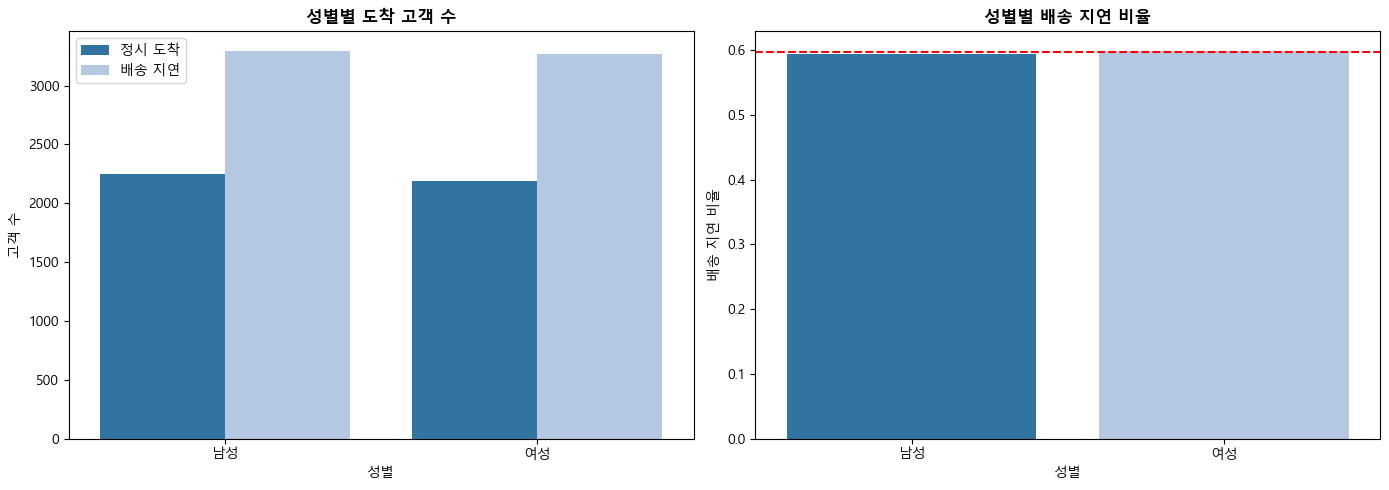

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Gender', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('성별별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['남성', '여성'])
axes[0].set_xlabel('성별')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Gender', y='target', data=df, palette='tab20', hue='Gender', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('성별별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['남성', '여성'])
axes[1].set_xlabel('성별')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

### **Discount offered**: 해당 제품에 제공된 할인액

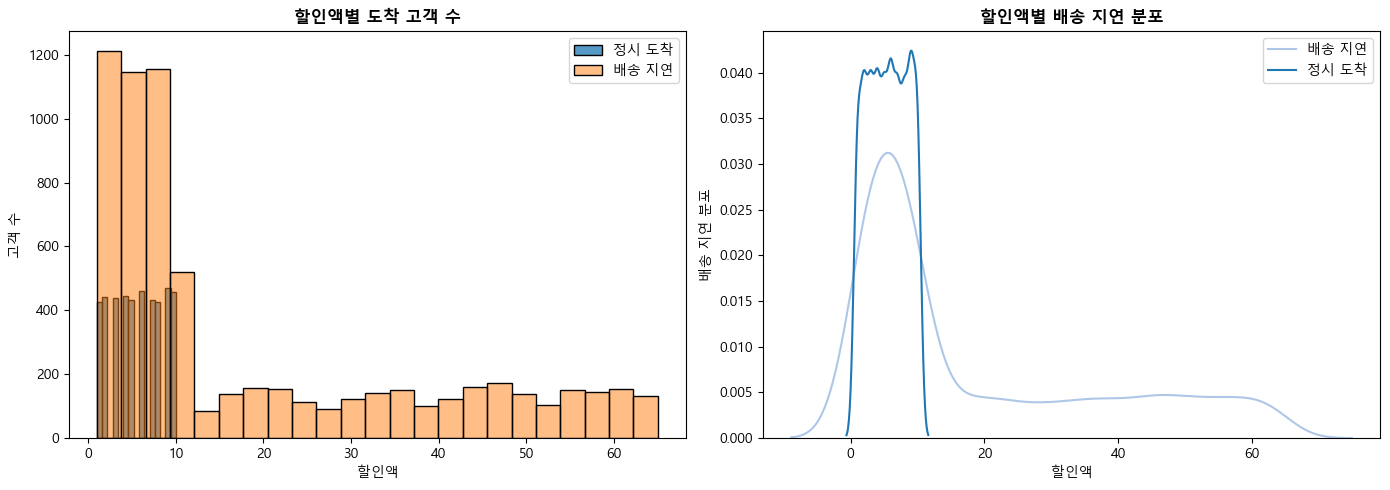

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Discount_offered'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Discount_offered'], ax=axes[0], alpha=0.5)
axes[0].set_title('할인액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('할인액')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Discount_offered', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('할인액별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('할인액')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

### **Weight in gms**: 제품 무게 (그램 단위)

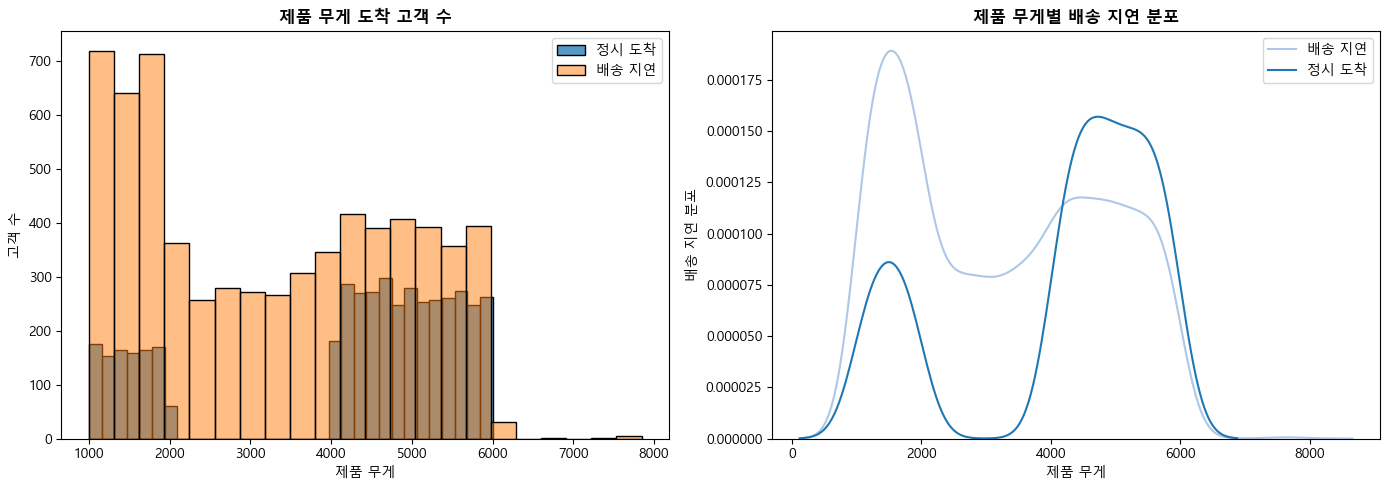

In [255]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Weight_in_gms'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Weight_in_gms'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 무게 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 무게')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Weight_in_gms', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

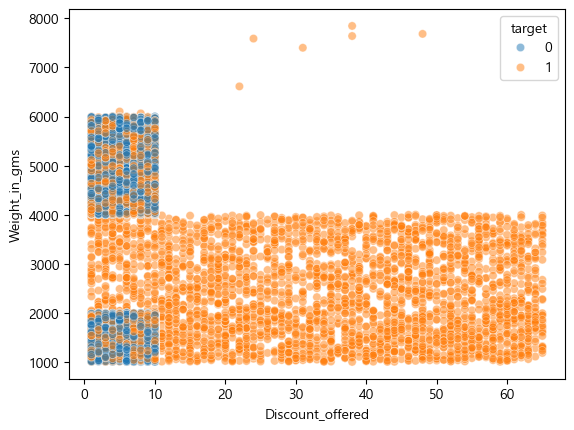

In [256]:
sns.scatterplot(x='Discount_offered', y='Weight_in_gms', hue='target', data=df, alpha=0.5)
plt.show()

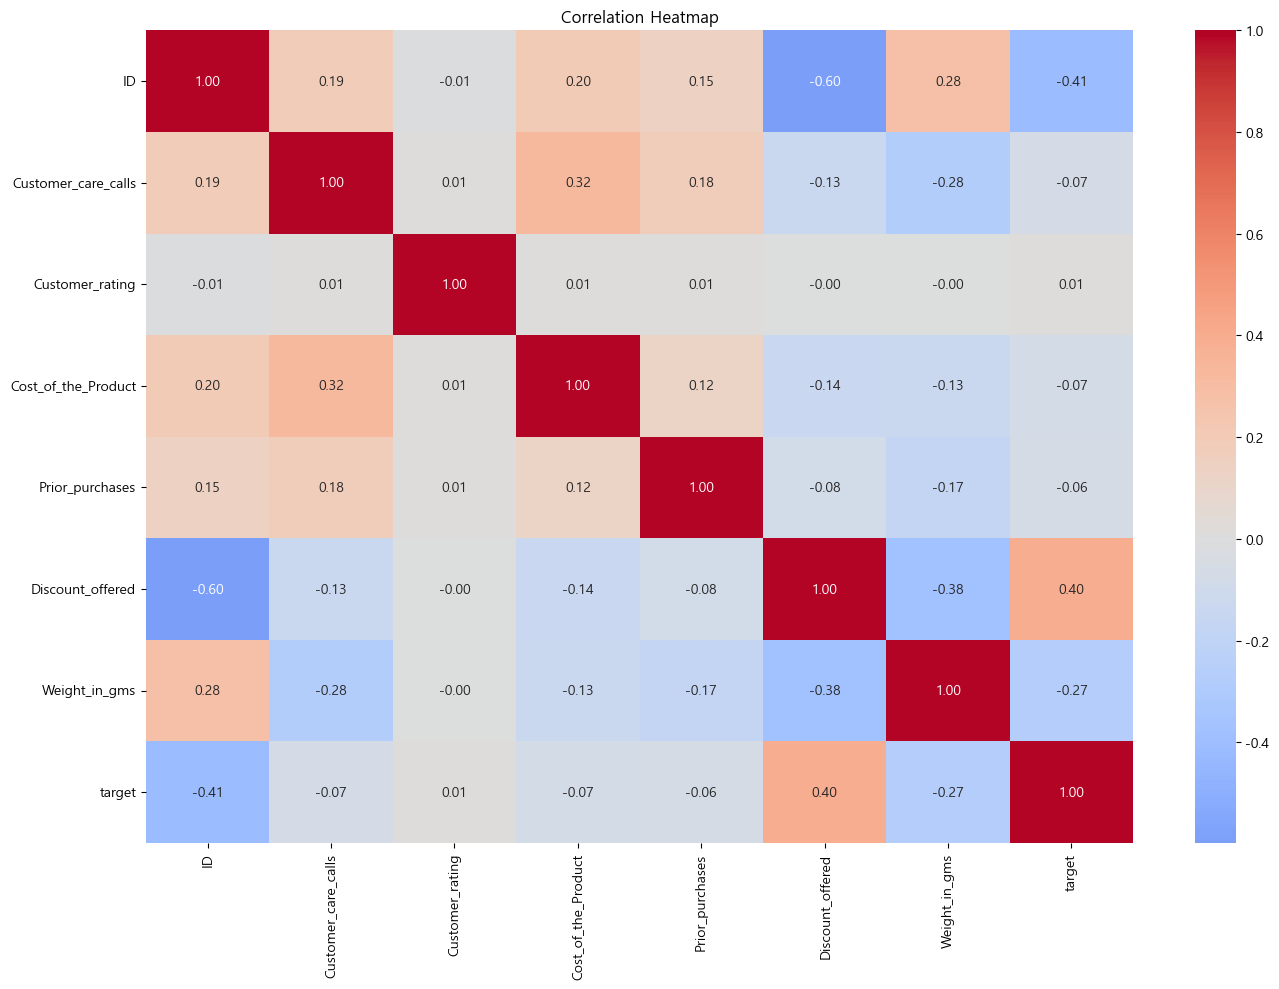

In [257]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']).corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

지연 결정 요인: 
* 할인 제공 수준 (세관 문제 추정)
* 상품 무게 (적재 제외 추정)

운영 변수: <br>
터미널 혼잡(배송 수단·창고 구역)이 지연에 미치는 영향은 미미함<br>
고객 변수: <br>
개인 특성(성별, 평점 등)은 지연 여부와 통계적으로 무관함<br>

결론: 물류 지연은 고객 특성이나 인프라 환경보다 통관 행정(가격) 및 적재 공정(무게) 등 화물 처리 데이터와 밀접하게 관련되어 있음

### 2. 특성 엔지니어링

In [258]:
# 1. 할인액 범주화 (Discount_Category) -> 범위
# 할인율 10%를 기점으로 '낮음'과 '높음'으로 분류합니다.
df['Discount_Category'] = pd.cut(df['Discount_offered'], bins=[0, 10, 100], labels=['Low', 'High'], include_lowest=True)

# 2. 무게 구간 분류 (Weight_Category) -> 범위
# 연속적인 무게 데이터를 지연 패턴에 따라 가벼움, 보통, 무거움의 3개 구간으로 나눕니다.
df['Weight_Category'] = pd.cut(df['Weight_in_gms'], bins=[0, 2000, 4000, 8000], labels=['Light', 'Medium', 'Heavy'])

# 3. 무게 대비 할인 비중 (Discount_Weight_Ratio) -> 지연 결정 요인
# 화물 무게와 할인 금액 간의 관계를 계산하여 저가 신고 의심 여부를 분석합니다.
df['Discount_Weight_Ratio'] = df['Discount_offered'] / (df['Weight_in_gms'] + 1)

# 4. 최종 결제 금액 (Final_Cost) -> 세관 문제
# 제품 가격에 할인율을 적용하여 고객이 실제로 지불한 최종 금액을 산출합니다.
df['Final_Cost'] = df['Cost_of_the_Product'] * (1 - df['Discount_offered'] / 100)

# 5. 중요도별 무게 비중 (Weight_Load_Factor) -> 적재 제외
# 제품 중요도 대비 무게를 계산하여 적재 시 우선순위에서 밀려날 가능성을 수치화합니다.
importance_map = {'low': 1, 'medium': 2, 'high': 3}
df['Weight_Load_Factor'] = df['Weight_in_gms'] / (df['Product_importance'].map(importance_map))


삭제할 컬럼
* 터미널 혼잡<br>
-> 배송 수단(Mode), 창고 구역(Block)<br>
---------------------------------------------------------------------------------------------
* 정시 도착 여부와 고객들의 관계: 관계성을 확인하고자 삭제 X <br>
-> 고객 문의 횟수 (Customer care calls),고객 평점 (Customer rating),이전 구매 횟수 (Prior purchases),성별 (Gender)<br>

In [259]:
df = df.drop(['ID','Warehouse_block','Mode_of_Shipment'], axis=1)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Customer_care_calls    10999 non-null  int64   
 1   Customer_rating        10999 non-null  int64   
 2   Cost_of_the_Product    10999 non-null  int64   
 3   Prior_purchases        10999 non-null  int64   
 4   Product_importance     10999 non-null  object  
 5   Gender                 10999 non-null  object  
 6   Discount_offered       10999 non-null  int64   
 7   Weight_in_gms          10999 non-null  int64   
 8   target                 10999 non-null  int64   
 9   Discount_Category      10999 non-null  category
 10  Weight_Category        10999 non-null  category
 11  Discount_Weight_Ratio  10999 non-null  float64 
 12  Final_Cost             10999 non-null  float64 
 13  Weight_Load_Factor     10999 non-null  float64 
dtypes: category(2), float64(3), int64(7), 

* 라벨 인코딩(Label Encoding)

In [261]:
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_care_calls    10999 non-null  int64  
 1   Customer_rating        10999 non-null  int64  
 2   Cost_of_the_Product    10999 non-null  int64  
 3   Prior_purchases        10999 non-null  int64  
 4   Product_importance     10999 non-null  int64  
 5   Gender                 10999 non-null  int64  
 6   Discount_offered       10999 non-null  int64  
 7   Weight_in_gms          10999 non-null  int64  
 8   target                 10999 non-null  int64  
 9   Discount_Category      10999 non-null  int64  
 10  Weight_Category        10999 non-null  int64  
 11  Discount_Weight_Ratio  10999 non-null  float64
 12  Final_Cost             10999 non-null  float64
 13  Weight_Load_Factor     10999 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


* 원-핫 인코딩(One-Hot Encoding)

In [262]:
# df = pd.get_dummies(df, columns=['Discount_Category','Weight_Category'])

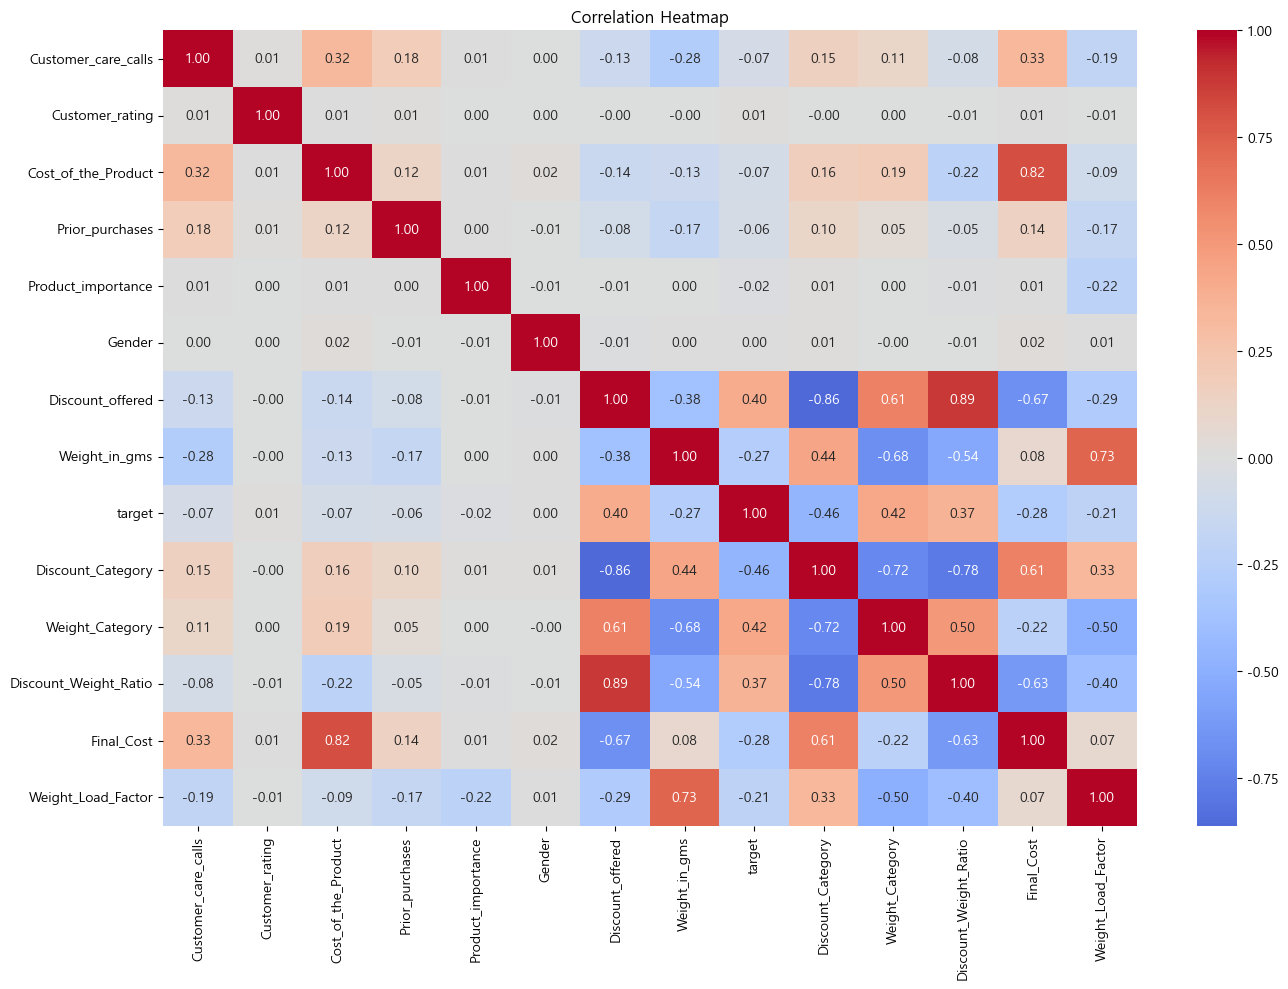

In [263]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [264]:
df.describe().round(4)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target,Discount_Category,Weight_Category,Discount_Weight_Ratio,Final_Cost,Weight_Load_Factor
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,4.0545,2.9905,210.1968,3.5676,1.3460,0.4959,13.3732,3634.0167,0.5967,0.7593,0.6201,0.0060,183.1640,2601.6454
std,1.1415,1.4136,48.0633,1.5229,0.6314,0.5000,16.2055,1635.3773,0.4906,0.4275,0.7488,0.0094,56.9073,1553.1516
min,2.0000,1.0000,96.0000,2.0000,0.0000,0.0000,1.0000,1001.0000,0.0000,0.0000,0.0000,0.0002,36.6300,335.6667
25%,3.0000,2.0000,169.0000,3.0000,1.0000,0.0000,4.0000,1839.5000,0.0000,1.0000,0.0000,0.0009,140.1500,1400.0000
50%,4.0000,3.0000,214.0000,3.0000,1.0000,0.0000,7.0000,4149.0000,1.0000,1.0000,0.0000,0.0017,186.2400,2196.5000
75%,5.0000,4.0000,251.0000,4.0000,2.0000,1.0000,10.0000,5050.0000,1.0000,1.0000,1.0000,0.0062,231.2800,3859.5000
max,7.0000,5.0000,310.0000,10.0000,2.0000,1.0000,65.0000,7846.0000,1.0000,1.0000,2.0000,0.0595,306.9000,6000.0000


* 표준화(Standardization)

In [265]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df['Cost_of_the_Product'] = standard_scaler.fit_transform(df['Cost_of_the_Product'].values.reshape(-1,1))
df['Discount_offered'] = standard_scaler.fit_transform(df['Discount_offered'].values.reshape(-1,1))
df['Weight_in_gms'] = standard_scaler.fit_transform(df['Weight_in_gms'].values.reshape(-1,1))
df['Discount_Weight_Ratio'] = standard_scaler.fit_transform(df['Discount_Weight_Ratio'].values.reshape(-1,1))
df['Final_Cost'] = standard_scaler.fit_transform(df['Final_Cost'].values.reshape(-1,1))
df['Weight_Load_Factor'] = standard_scaler.fit_transform(df['Weight_Load_Factor'].values.reshape(-1,1))


df.describe().round(4)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target,Discount_Category,Weight_Category,Discount_Weight_Ratio,Final_Cost,Weight_Load_Factor
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,4.0545,2.9905,-0.0000,3.5676,1.3460,0.4959,-0.0000,-0.0000,0.5967,0.7593,0.6201,0.0000,-0.0000,0.0000
std,1.1415,1.4136,1.0000,1.5229,0.6314,0.5000,1.0000,1.0000,0.4906,0.4275,0.7488,1.0000,1.0000,1.0000
min,2.0000,1.0000,-2.3761,2.0000,0.0000,0.0000,-0.7636,-1.6101,0.0000,0.0000,0.0000,-0.6157,-2.5751,-1.4590
25%,3.0000,2.0000,-0.8572,3.0000,1.0000,0.0000,-0.5784,-1.0974,0.0000,1.0000,0.0000,-0.5335,-0.7559,-0.7737
50%,4.0000,3.0000,0.0791,3.0000,1.0000,0.0000,-0.3933,0.3149,1.0000,1.0000,0.0000,-0.4477,0.0541,-0.2609
75%,5.0000,4.0000,0.8490,4.0000,2.0000,1.0000,-0.2082,0.8659,1.0000,1.0000,1.0000,0.0213,0.8456,0.8099
max,7.0000,5.0000,2.0766,10.0000,2.0000,1.0000,3.1859,2.5757,1.0000,1.0000,2.0000,5.6981,2.1744,2.1881


### 모델링

In [266]:
from sklearn.model_selection import train_test_split

# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(columns=['target'])
y_total = df['target']

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

### Logistic Regression

In [267]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

predictor = LogisticRegression()

predictor.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [268]:
# 검증 데이터 성능 평가
y_pred = predictor.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6786
Precision (정밀도): 0.7996
Recall (재현율): 0.6115
F1 Score: 0.6930


=== 특성 중요도 ===


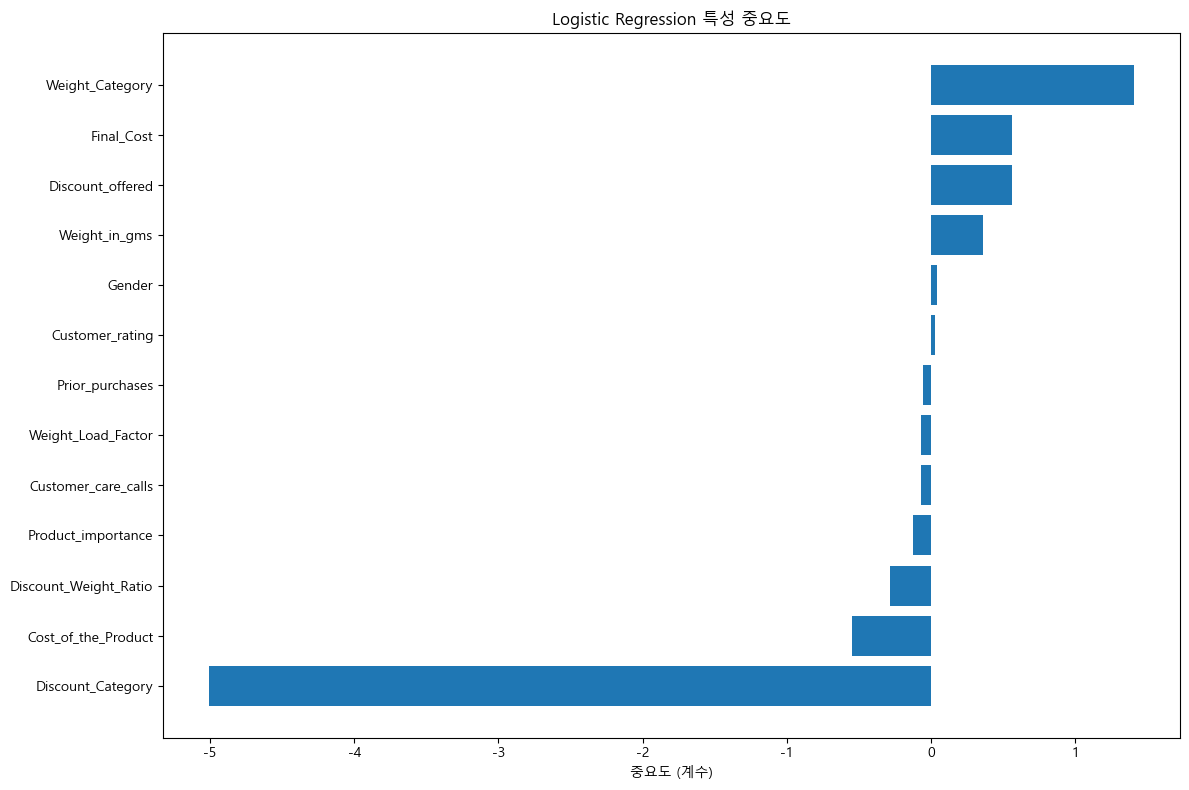

In [269]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': predictor.coef_[0]
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))

top_features = feature_importance

plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('중요도 (계수)')
plt.title('Logistic Regression 특성 중요도')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

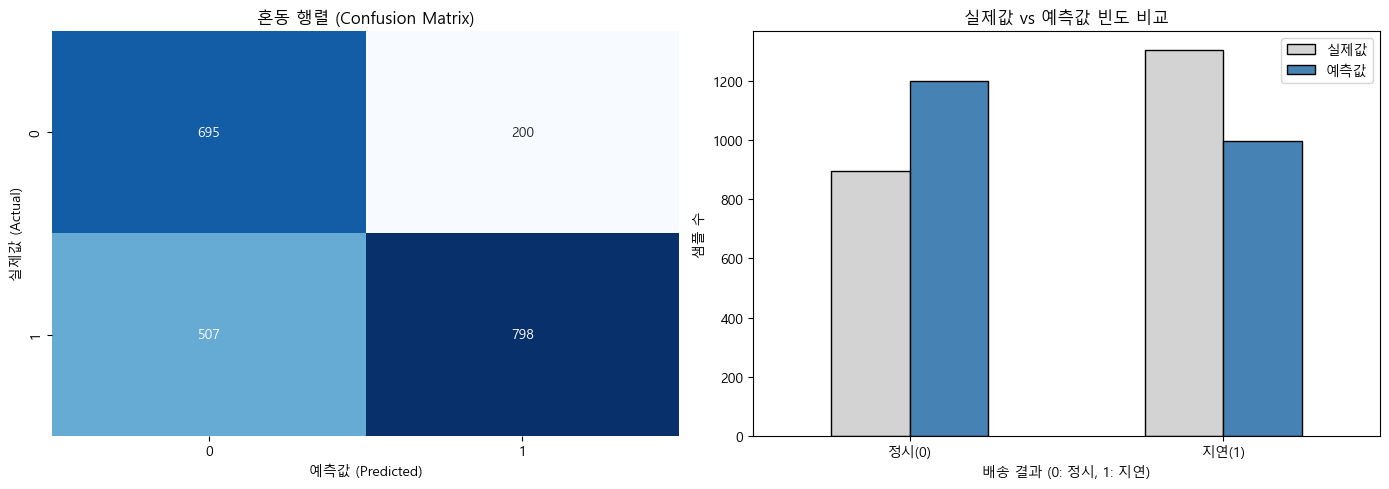

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1493
- 정확도(Accuracy): 0.6786


In [270]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

### Decision Tree

In [271]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
predictor = DecisionTreeClassifier()
predictor.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [272]:
# 검증 데이터 성능 평가
y_pred = predictor.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6445
Precision (정밀도): 0.7022
Recall (재현율): 0.6958
F1 Score: 0.6990


=== 특성 중요도 ===


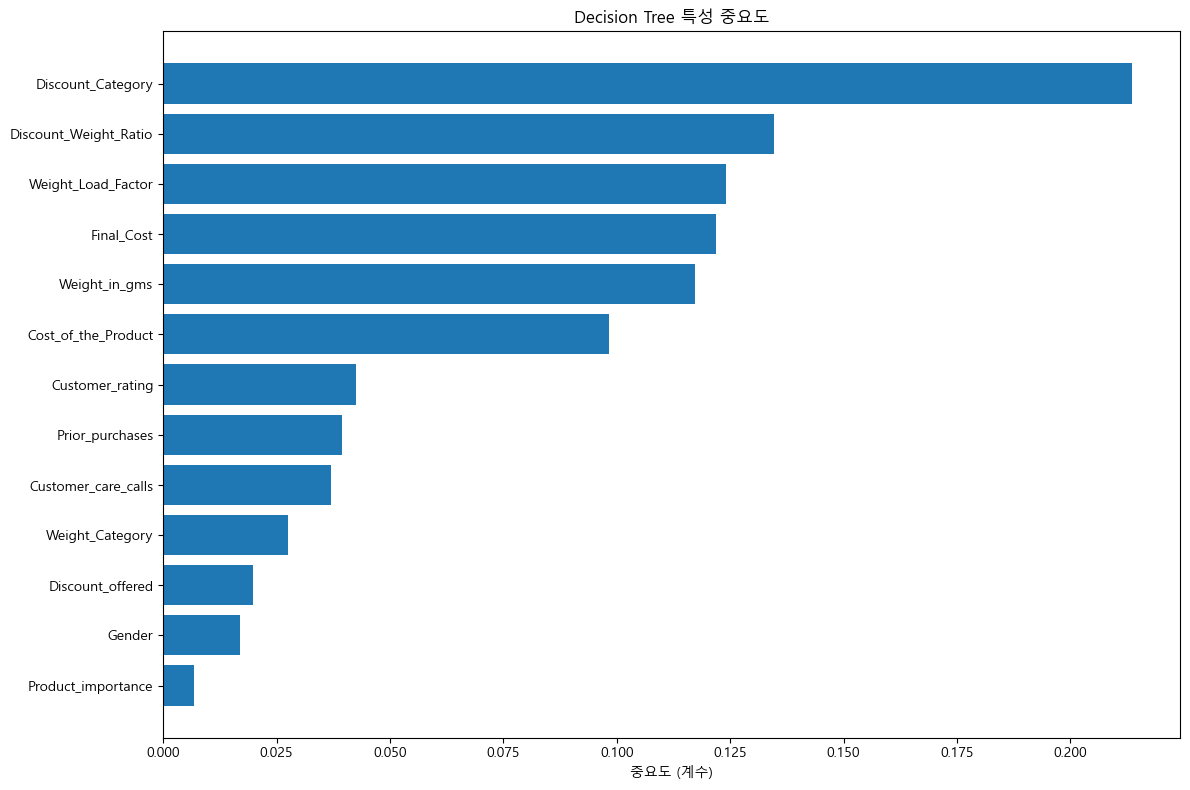

In [273]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': predictor.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))

top_features = feature_importance

plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('중요도 (계수)')
plt.title('Decision Tree 특성 중요도')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

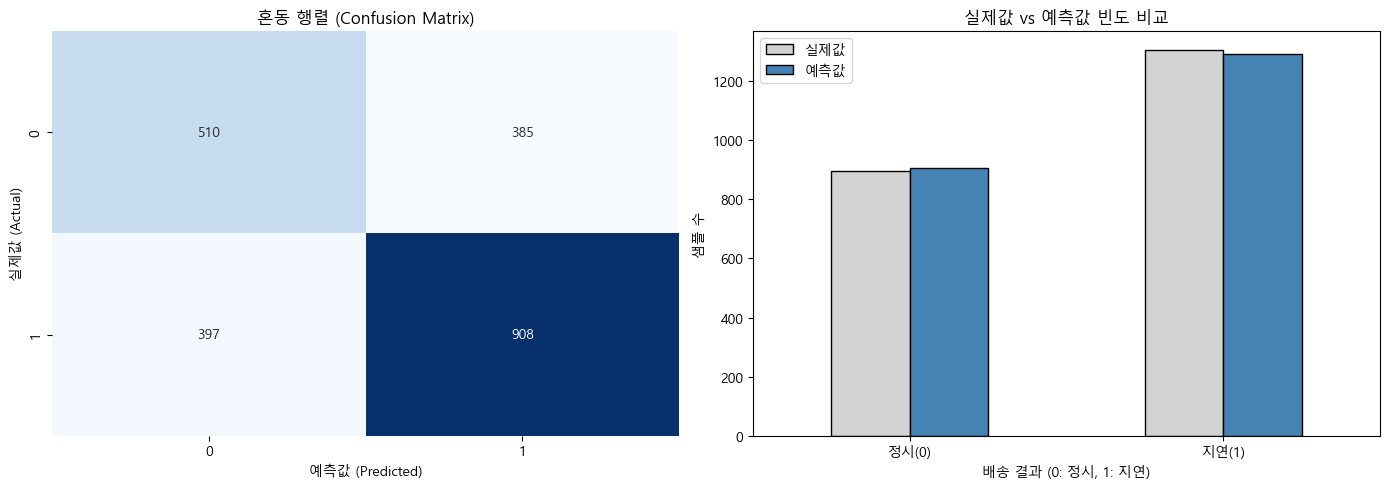

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1418
- 정확도(Accuracy): 0.6445


In [274]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

### Random Forest

In [275]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

predictor = RandomForestClassifier()

# 2. 모델 학습
predictor.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [276]:
# 검증 데이터 성능 평가
y_pred = predictor.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6614
Precision (정밀도): 0.7500
Recall (재현율): 0.6437
F1 Score: 0.6928


=== 특성 중요도 ===


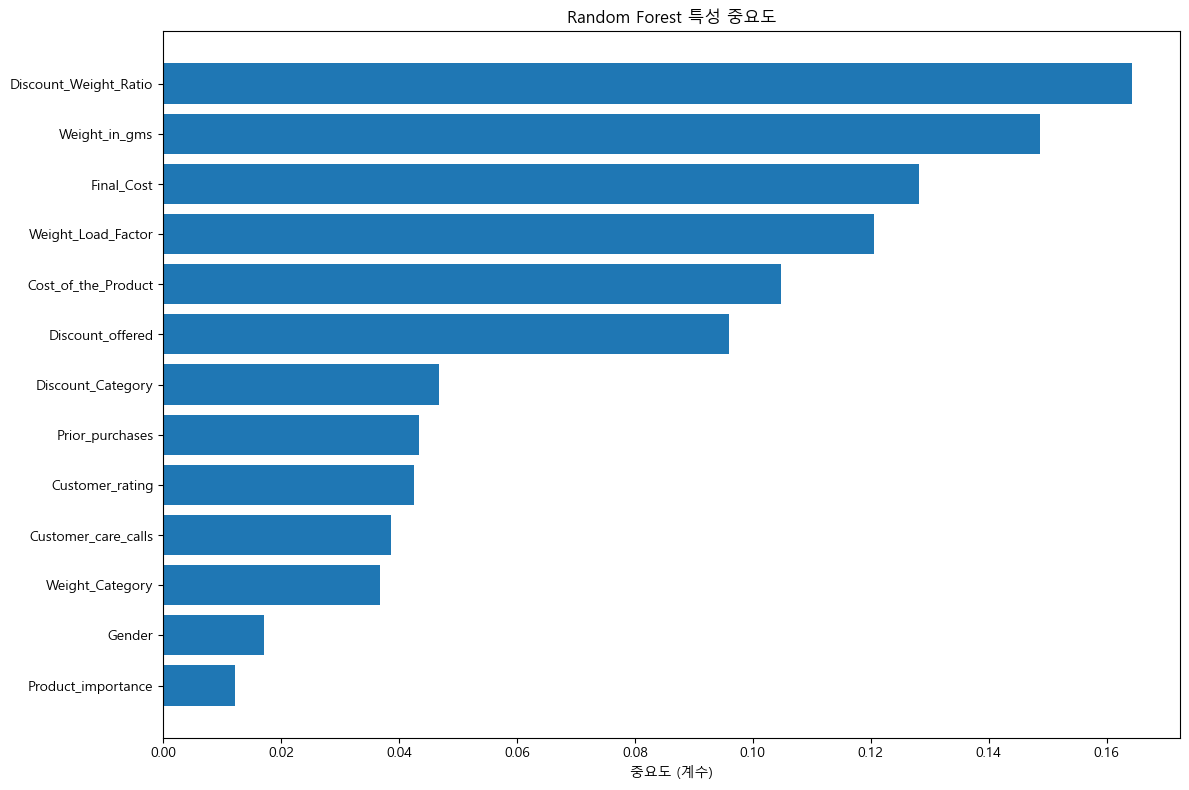

In [277]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': predictor.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))

top_features = feature_importance

plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('중요도 (계수)')
plt.title('Random Forest 특성 중요도')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

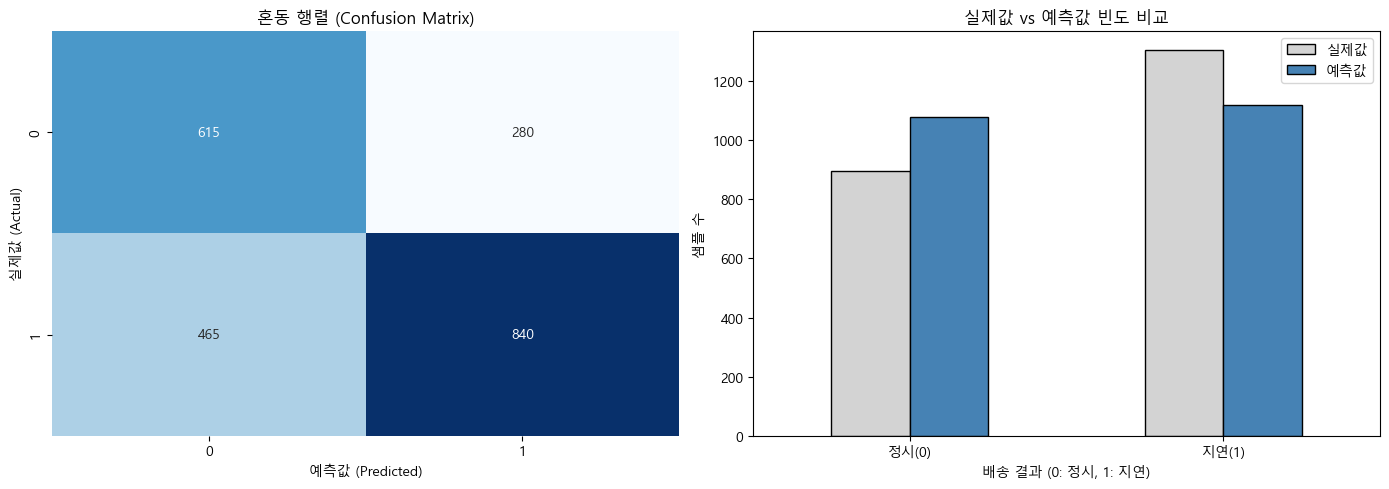

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1455
- 정확도(Accuracy): 0.6614


In [278]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

### AutoGluon

In [279]:
# 합치기
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

print(f'학습 데이터 크기: {train_data.shape}')
print(f'검증 데이터 크기: {test_data.shape}')

학습 데이터 크기: (8799, 14)
검증 데이터 크기: (2200, 14)


In [280]:
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor = TabularPredictor(
    label='target',                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='f1',               # 평가 지표 
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor.fit(
    train_data=train_data,
    tuning_data=test_data,             # 검증 데이터
    use_bag_holdout=True,
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       0.87 GB / 7.86 GB (11.1%)
Disk Space Avail:   109.46 GB / 237.43 GB (46.1%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799
Train Data Columns: 13
Tuning Data Rows:    2200
Tuning Data Columns: 13
Label Column:       target
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Featur

In [281]:
leaderboard = predictor.leaderboard(test_data,silent=True)
print(leaderboard[['model','score_val','fit_time']])

                  model  score_val    fit_time
0   WeightedEnsemble_L2   0.746450  212.992785
1               XGBoost   0.745850    7.013326
2              LightGBM   0.745549    8.557162
3            LightGBMXT   0.745132    7.794010
4       NeuralNetFastAI   0.711988   39.353007
5      RandomForestGini   0.700083    6.600132
6        ExtraTreesGini   0.694049    3.394998
7        ExtraTreesEntr   0.695326    4.517422
8        NeuralNetTorch   0.693046  203.849714
9      RandomForestEntr   0.693980    6.657374
10             CatBoost   0.663366    7.614924


In [282]:
# 검증 데이터 성능 평가
val_predictions = predictor.predict(test_data.drop('target', axis=1))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, val_predictions)
precision = precision_score(y_test, val_predictions)
recall = recall_score(y_test, val_predictions)
f1 = f1_score(y_test, val_predictions)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6023
Precision (정밀도): 0.6001
Recall (재현율): 0.9877
F1 Score: 0.7466


Computing feature importance via permutation shuffling for 13 features using 2200 rows with 5 shuffle sets...


=== 특성 중요도 ===


	28.27s	= Expected runtime (5.65s per shuffle set)
	6.52s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Discount_Weight_Ratio,0.004147,0.001808,0.003420,5,0.007869,0.000425
Cost_of_the_Product,0.003449,0.001737,0.005673,5,0.007026,-0.000129
Weight_Load_Factor,0.003115,0.001294,0.002877,5,0.005778,0.000451
Final_Cost,0.002682,0.001467,0.007495,5,0.005701,-0.000338
Product_importance,0.002590,0.001833,0.017118,5,0.006365,-0.001185
Weight_in_gms,0.002348,0.000676,0.000740,5,0.003739,0.000956
Customer_care_calls,0.002181,0.000929,0.003142,5,0.004093,0.000269
Gender,0.002089,0.001036,0.005369,5,0.004221,-0.000043
Customer_rating,0.000909,0.001407,0.111103,5,0.003806,-0.001988
Prior_purchases,0.000906,0.001119,0.072216,5,0.003210,-0.001398


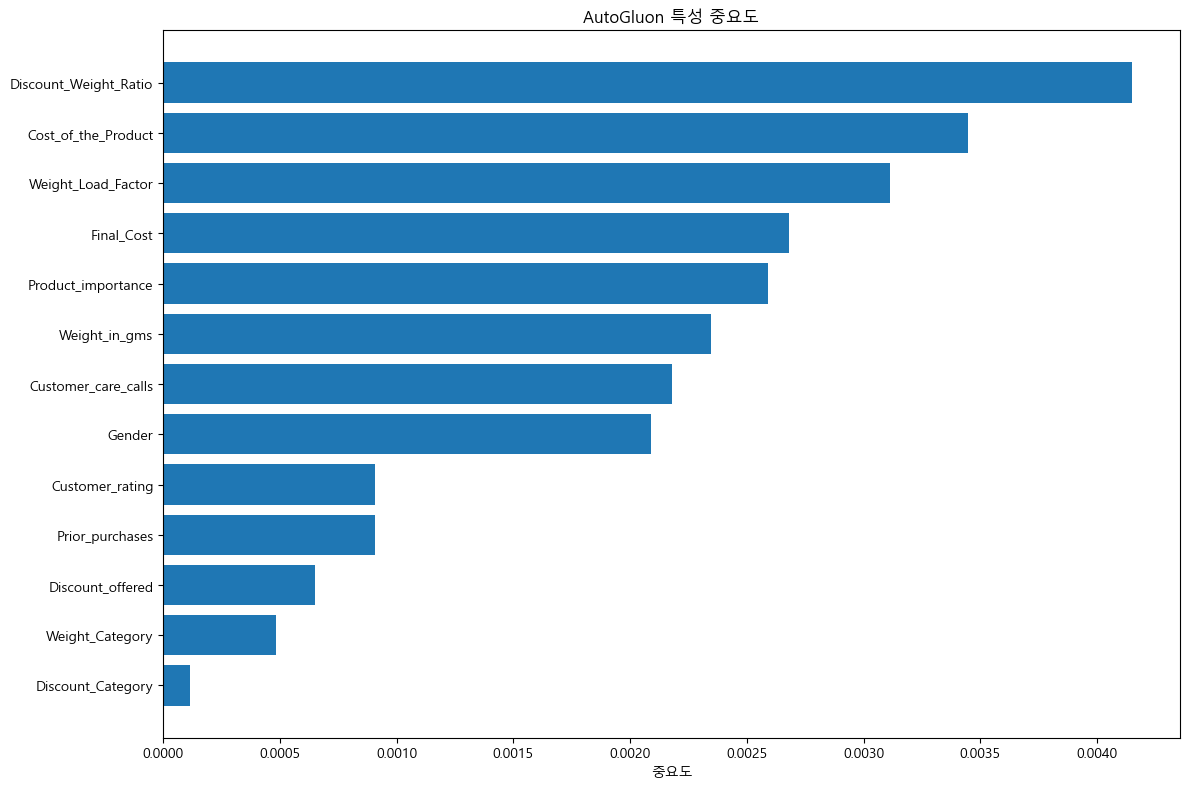

In [283]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = predictor.feature_importance(test_data)
display(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
top_features = feature_importance
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('중요도')
plt.title('AutoGluon 특성 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

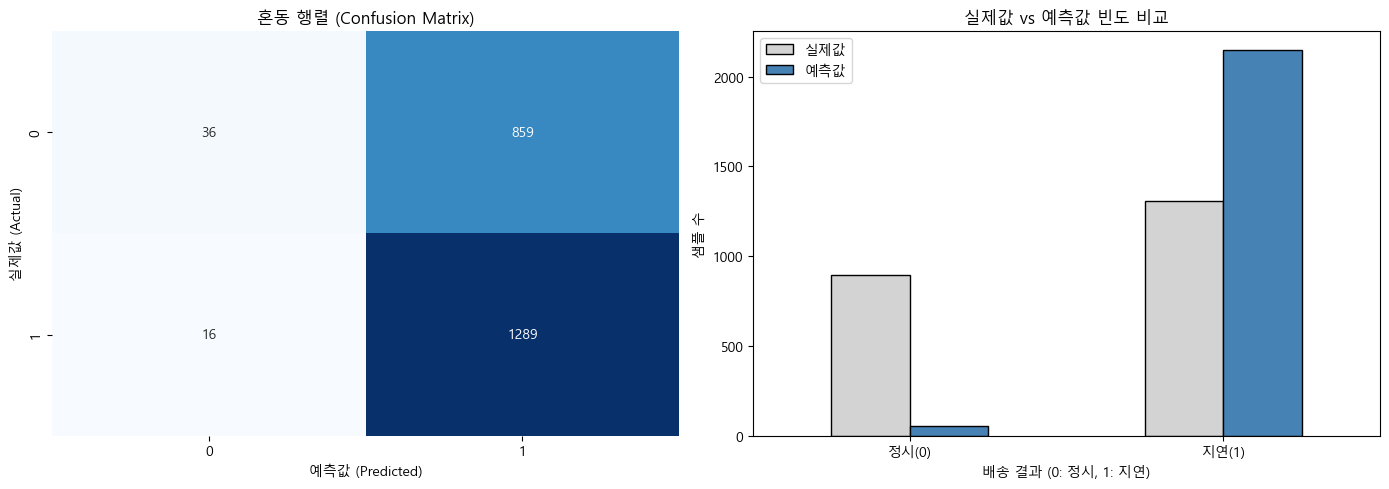

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1325
- 정확도(Accuracy): 0.6023


In [284]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop('target', axis=1))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

In [285]:
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor = TabularPredictor(
    label='target',                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='accuracy',               # 평가 지표 
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor.fit(
    train_data=train_data,
    tuning_data=test_data,             # 검증 데이터
    use_bag_holdout=True,
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.20 GB / 7.86 GB (15.2%)
Disk Space Avail:   109.46 GB / 237.43 GB (46.1%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799
Train Data Columns: 13
Tuning Data Rows:    2200
Tuning Data Columns: 13
Label Column:       target
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Featur

In [286]:
leaderboard = predictor.leaderboard(test_data,silent=True)
print(leaderboard[['model','score_val','fit_time']])

                  model  score_val   fit_time
0   WeightedEnsemble_L2   0.695909  83.751056
1        NeuralNetTorch   0.695000  79.190497
2              CatBoost   0.693636   4.269260
3       NeuralNetFastAI   0.691818  28.382995
4            LightGBMXT   0.691364   3.454139
5              LightGBM   0.679091   2.522233
6               XGBoost   0.679091   3.243634
7      RandomForestGini   0.670909   4.852317
8         LightGBMLarge   0.669091   4.977035
9        ExtraTreesEntr   0.668182   2.566767
10       ExtraTreesGini   0.668182   2.827468
11     RandomForestEntr   0.667273   5.416218


In [287]:
# 검증 데이터 성능 평가
val_predictions = predictor.predict(test_data.drop('target', axis=1))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, val_predictions)
precision = precision_score(y_test, val_predictions)
recall = recall_score(y_test, val_predictions)
f1 = f1_score(y_test, val_predictions)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6959
Precision (정밀도): 0.9848
Recall (재현율): 0.4950
F1 Score: 0.6588


Computing feature importance via permutation shuffling for 13 features using 2200 rows with 5 shuffle sets...


=== 특성 중요도 ===


	10.83s	= Expected runtime (2.17s per shuffle set)
	2.56s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Weight_Category,0.079818,0.005394,0.000002,5,0.090924,0.068713
Final_Cost,0.010000,0.003402,0.001386,5,0.017004,0.002996
Weight_in_gms,0.009818,0.002418,0.000408,5,0.014797,0.004839
Discount_Category,0.005636,0.004149,0.019239,5,0.014178,-0.002906
Prior_purchases,0.005545,0.001885,0.001383,5,0.009427,0.001664
Customer_care_calls,0.004818,0.001185,0.000406,5,0.007259,0.002378
Customer_rating,0.004364,0.000518,0.000023,5,0.005431,0.003297
Discount_offered,0.003727,0.001620,0.003384,5,0.007063,0.000392
Product_importance,0.003273,0.001772,0.007250,5,0.006922,-0.000376
Weight_Load_Factor,0.002818,0.001037,0.001850,5,0.004952,0.000684


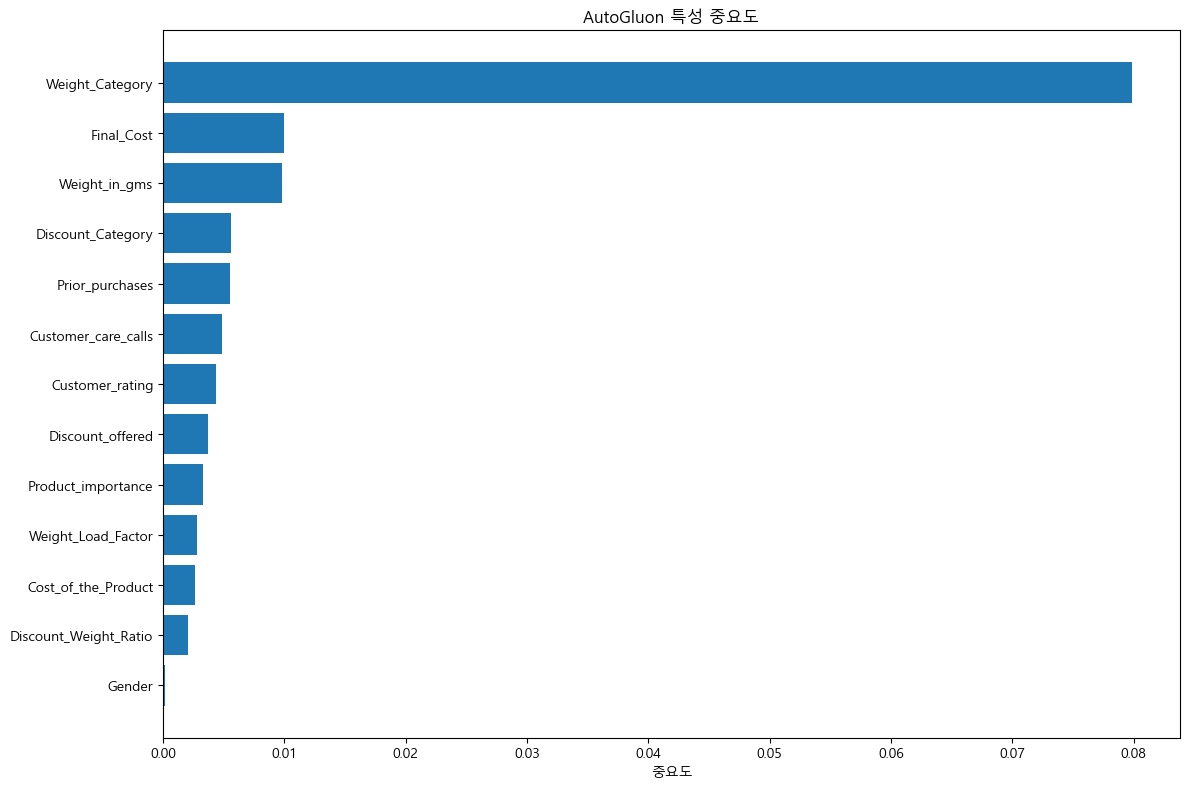

In [288]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = predictor.feature_importance(test_data)
display(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
top_features = feature_importance
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('중요도')
plt.title('AutoGluon 특성 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

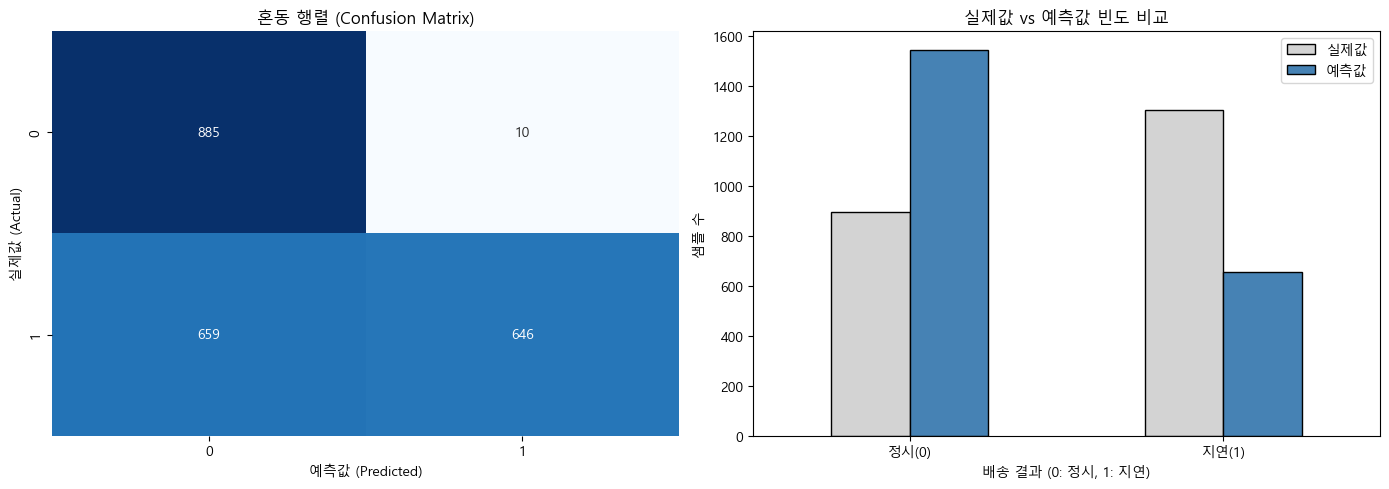

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1531
- 정확도(Accuracy): 0.6959


In [289]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop('target', axis=1))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

In [290]:
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor = TabularPredictor(
    label='target',                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='roc_auc',               # 평가 지표 
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor.fit(
    train_data=train_data,
    tuning_data=test_data,             # 검증 데이터
    use_bag_holdout=True,
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.23 GB / 7.86 GB (15.6%)
Disk Space Avail:   109.47 GB / 237.43 GB (46.1%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799
Train Data Columns: 13
Tuning Data Rows:    2200
Tuning Data Columns: 13
Label Column:       target
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Featur

In [291]:
leaderboard = predictor.leaderboard(test_data,silent=True)
print(leaderboard[['model','score_val','fit_time']])

                  model  score_val   fit_time
0   WeightedEnsemble_L2   0.755038  73.157582
1        NeuralNetTorch   0.753895  37.945976
2       NeuralNetFastAI   0.750560  34.761275
3              CatBoost   0.741072   8.174382
4         LightGBMLarge   0.740245  13.621274
5      RandomForestGini   0.738487   8.012242
6        ExtraTreesEntr   0.738480   3.637344
7        ExtraTreesGini   0.737299   3.742962
8            LightGBMXT   0.736505   2.610806
9      RandomForestEntr   0.735767  15.179817
10             LightGBM   0.735205   4.311509
11              XGBoost   0.734609   2.931385


In [292]:
# 검증 데이터 성능 평가
val_predictions = predictor.predict(test_data.drop('target', axis=1))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, val_predictions)
precision = precision_score(y_test, val_predictions)
recall = recall_score(y_test, val_predictions)
f1 = f1_score(y_test, val_predictions)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6909
Precision (정밀도): 0.9699
Recall (재현율): 0.4943
F1 Score: 0.6548


Computing feature importance via permutation shuffling for 13 features using 2200 rows with 5 shuffle sets...


=== 특성 중요도 ===


	29.93s	= Expected runtime (5.99s per shuffle set)
	7.25s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Weight_Category,0.084957,0.003722,4.407667e-07,5,0.092620,0.077294
Prior_purchases,0.007344,0.001732,3.449916e-04,5,0.010909,0.003778
Discount_Category,0.005095,0.003507,1.570979e-02,5,0.012317,-0.002126
Customer_rating,0.003625,0.002807,2.232306e-02,5,0.009404,-0.002154
Weight_Load_Factor,0.003218,0.002712,2.838813e-02,5,0.008803,-0.002366
Weight_in_gms,0.002132,0.001122,6.580601e-03,5,0.004442,-0.000178
Cost_of_the_Product,0.001238,0.000958,2.228491e-02,5,0.003210,-0.000734
Discount_Weight_Ratio,0.000485,0.002252,3.277794e-01,5,0.005122,-0.004153
Product_importance,0.000089,0.001769,4.579010e-01,5,0.003731,-0.003553
Discount_offered,-0.000257,0.002408,5.883082e-01,5,0.004702,-0.005215


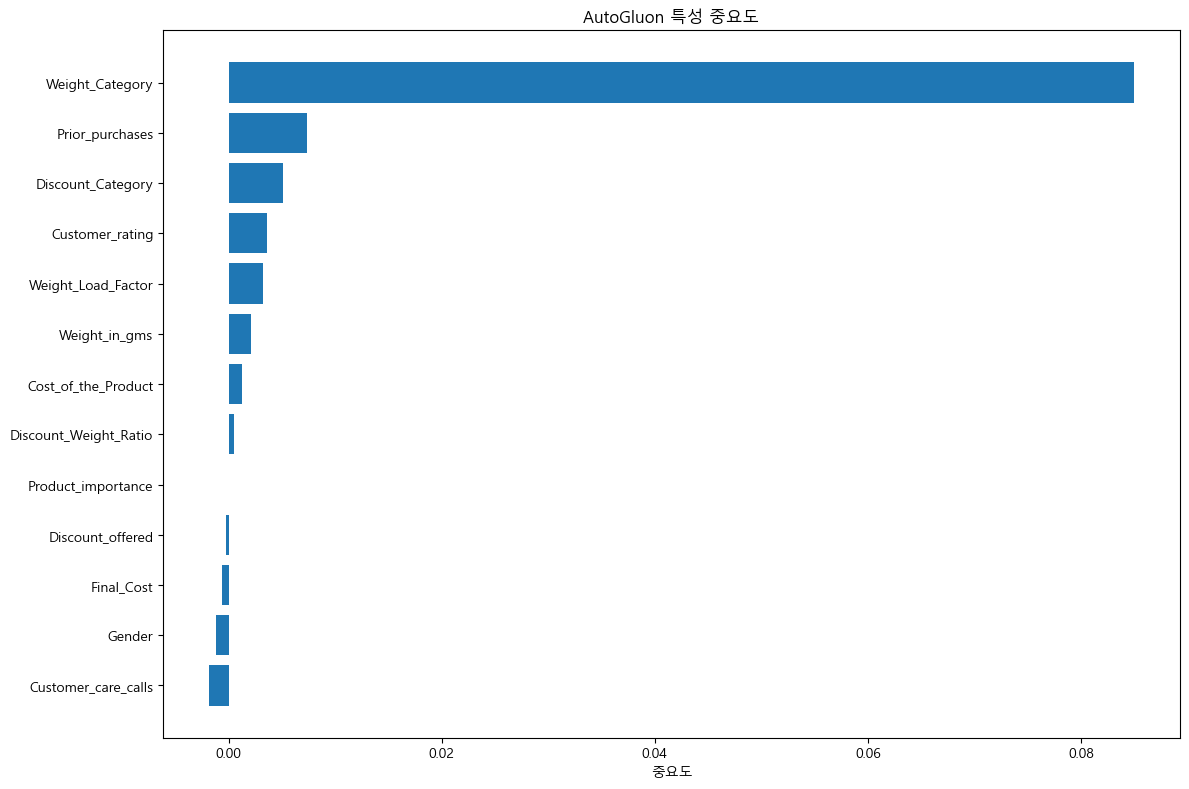

In [293]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = predictor.feature_importance(test_data)
display(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
top_features = feature_importance
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('중요도')
plt.title('AutoGluon 특성 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

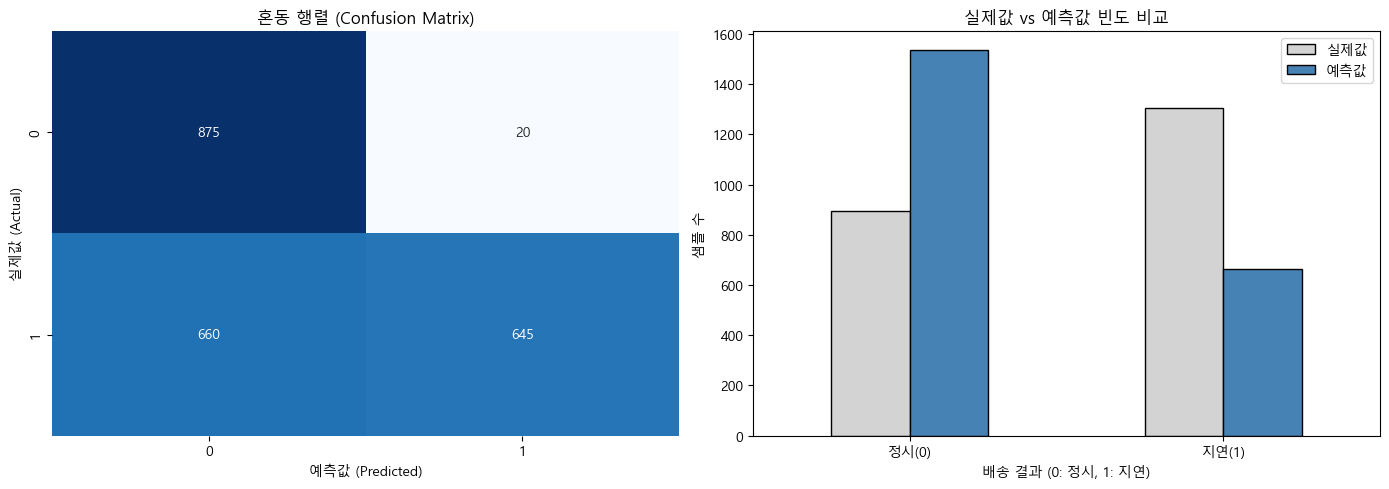

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1520
- 정확도(Accuracy): 0.6909


In [294]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop('target', axis=1))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    '실제값': y_test.value_counts().sort_index(),
    '예측값': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')